In [139]:
import pandas as pd
import matplotlib.pyplot as plt

from agage_archive.io import read_nc, read_c, combine_datasets, read_ale_gage

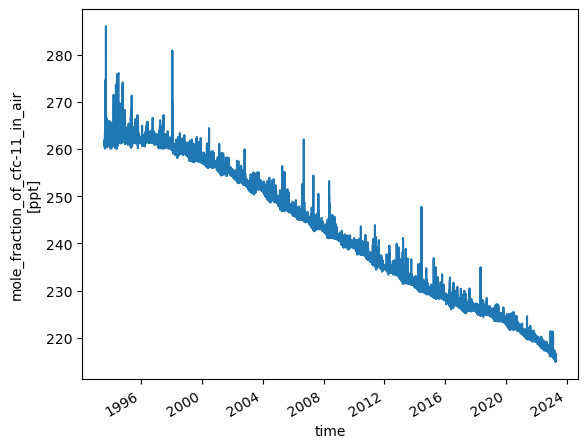

In [3]:
df_CGO = read_nc("cfc-11", "CGO", "GCMD")

df_CGO.mf.plot()


In [160]:
df = read_c("CH3CCl3", "ADR", "ALE")

<Axes: >

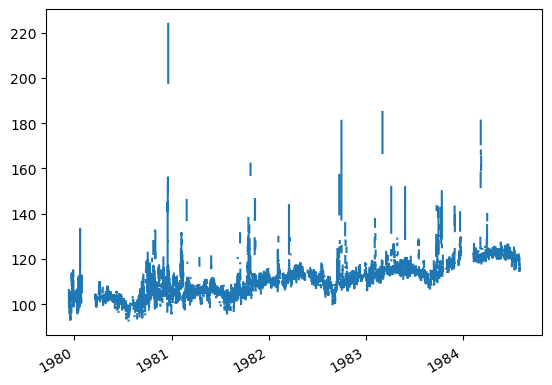

In [94]:
df["mf"].plot()


In [191]:
df_ale_gage = read_ale_gage("SMO", "ALE")

78 AUG
78 DEC
78 JUL
78 NOV
78 OCT
78 SEP
79 APR
79 AUG
79 DEC
79 FEB
79 JAN
79 JUL
79 JUN
79 MAR
79 MAY
79 NOV
79 OCT
79 SEP
80 APR
80 AUG
80 DEC
80 FEB
80 JAN
80 JUL
80 JUN
80 MAR
80 MAY
80 NOV
80 OCT
80 SEP
81 APR
81 AUG
81 DEC
81 FEB
81 JAN
81 JUL
81 JUN
81 MAR
81 MAY
81 NOV
1/OCT/81:0447
1/OCT/81:0547
1/OCT/81:1217
1/OCT/81:1317
1/OCT/81:1825
1/OCT/81:1925
2/OCT/81:0026
2/OCT/81:0126
2/OCT/81:0634
2/OCT/81:0734
3/OCT/81:1343
3/OCT/81:1443
5/OCT/81:1248
5/OCT/81:1348
5/OCT/81:1846
5/OCT/81:1946
6/OCT/81:1416
6/OCT/81:1516
6/OCT/81:2016
6/OCT/81:2116
7/OCT/81:0224
7/OCT/81:0324
7/OCT/81:0825
7/OCT/81:0925
7/OCT/81:1433
7/OCT/81:1533
7/OCT/81:2034
7/OCT/81:2134
8/OCT/81:0242
8/OCT/81:0342
8/OCT/81:0842
8/OCT/81:0943
8/OCT/81:1450
8/OCT/81:1550
8/OCT/81:1752
8/OCT/81:1852
9/OCT/81:0001
9/OCT/81:0100
9/OCT/81:0601
9/OCT/81:0701
9/OCT/81:1209
9/OCT/81:1309
9/OCT/81:1810
9/OCT/81:1910
10/OCT/81:0018
10/OCT/81:0118
10/OCT/81:0618
10/OCT/81:0719
10/OCT/81:1140
10/OCT/81:1242
10/OCT/81:1741

ValueError: unconverted data remains: 5

<Axes: >

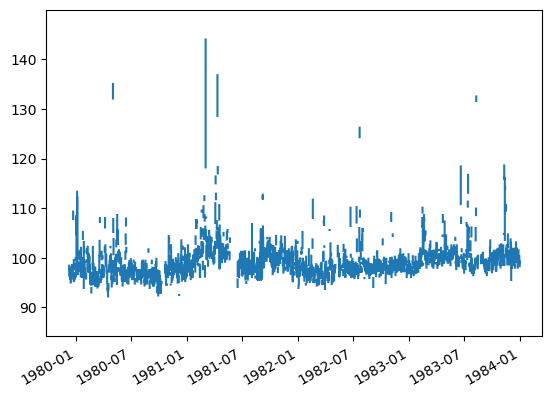

In [186]:
df_ale_gage["CCL4"].plot()

In [182]:
df_ale_gage.loc[df_ale_gage["TIME"] == 2305, "DA"]

1978-08-02 23:05:00    10
1978-08-03 23:05:00    10
1978-08-04 23:05:00    10
1978-08-05 23:05:00    10
1978-08-06 23:05:00    10
1978-08-07 23:05:00    10
1978-08-11 23:05:00    10
1978-08-29 23:05:00    10
1978-08-30 23:05:00    10
1978-08-31 23:05:00    10
1978-07-22 23:05:00    10
1978-07-25 23:05:00    10
1978-07-26 23:05:00    10
1978-07-27 23:05:00    10
1978-11-27 23:05:00    10
1978-09-07 23:05:00    10
1978-09-09 23:05:00    10
1979-08-16 23:05:00    10
1979-08-17 23:05:00    10
1979-12-11 23:05:00    10
1979-11-28 23:05:00    10
1979-10-25 23:05:00    10
1979-09-01 23:05:00    10
1980-02-14 23:05:00    10
1980-02-25 23:05:00    10
1980-01-21 23:05:00    10
1980-01-22 23:05:00    10
1980-01-29 23:05:00    10
1980-06-03 23:05:00    10
1980-06-13 23:05:00    10
1980-03-09 23:05:00    10
1980-03-20 23:05:00    10
1980-03-28 23:05:00    10
1980-05-05 23:05:00    10
1980-05-23 23:05:00    10
1980-05-29 23:05:00    10
Name: DA, dtype: int64

In [171]:
df_ale_gage

,DA,TIME,ABSDA,F-11S,F-11S_pollution,F-11P,F-11P_pollution,F-12,F-12_pollution,CH3CCL3,CH3CCL3_pollution,CCL4,CCL4_pollution,N2O,N2O_pollution
1978-08-02 16:59:00,3,1659,153,NaN,NaN,NaN,NaN,NaN,NaN,79.4,NaN,93.2,NaN,NaN,NaN
1978-08-02 18:02:00,3,1802,153,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN,88.0,NaN,NaN,NaN
1978-08-02 23:05:00,3,2305,153,149.7,NaN,NaN,NaN,NaN,NaN,74.4,NaN,89.8,NaN,NaN,NaN
1978-08-03 00:06:00,4,6,154,151.9,NaN,NaN,NaN,NaN,NaN,86.8,NaN,93.2,NaN,NaN,NaN
1978-08-03 04:08:00,4,408,154,147.3,NaN,NaN,NaN,NaN,NaN,74.8,NaN,88.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986-03-31 09:08:00,32,908,2951,NaN,NaN,222.9,NaN,408.0,NaN,NaN,NaN,NaN,NaN,306.2,NaN
1986-03-31 12:08:00,32,1208,2951,221.2,NaN,NaN,NaN,NaN,NaN,119.7,NaN,103.1,NaN,NaN,NaN
1986-03-31 15:09:00,32,1509,2951,NaN,NaN,220.6,NaN,411.0,NaN,NaN,NaN,NaN,NaN,307.2,NaN
1986-03-31 18:09:00,32,1809,2951,221.7,NaN,NaN,NaN,NaN,NaN,119.0,NaN,102.0,NaN,NaN,NaN
